In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime as dt

In [2]:
%matplotlib notebook

In [3]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [4]:
confirmed_df = pd.read_csv(confirmed_url)
confirmed_df = confirmed_df.drop(columns=['Lat','Long']).groupby('Country/Region').agg(np.sum)
confirmed_df.columns = pd.to_datetime(confirmed_df.columns)

In [5]:
confirmed_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
Albania,0,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
Algeria,0,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
Andorra,0,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
Angola,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [6]:
size = int(np.ceil((pd.Timestamp.now() - pd.to_datetime('2020-01-22'))/dt.timedelta(weeks=1)))
bins = [pd.to_datetime('2020-01-22') + dt.timedelta(weeks=i) for i in range(size)]
bins

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-29 00:00:00'),
 Timestamp('2020-02-05 00:00:00'),
 Timestamp('2020-02-12 00:00:00'),
 Timestamp('2020-02-19 00:00:00'),
 Timestamp('2020-02-26 00:00:00'),
 Timestamp('2020-03-04 00:00:00'),
 Timestamp('2020-03-11 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-25 00:00:00')]

<IPython.core.display.Javascript object>


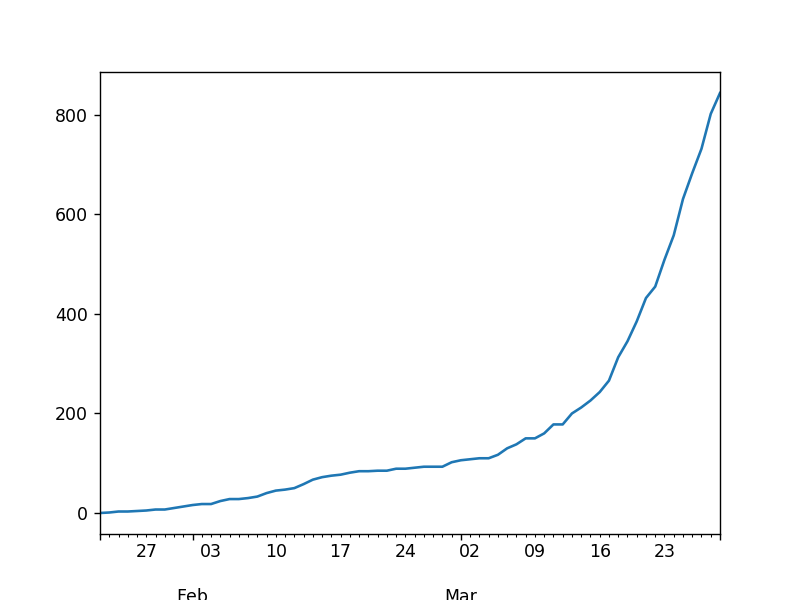

In [7]:
Singapore = confirmed_df.loc['Singapore']
Singapore.plot()

<IPython.core.display.Javascript object>


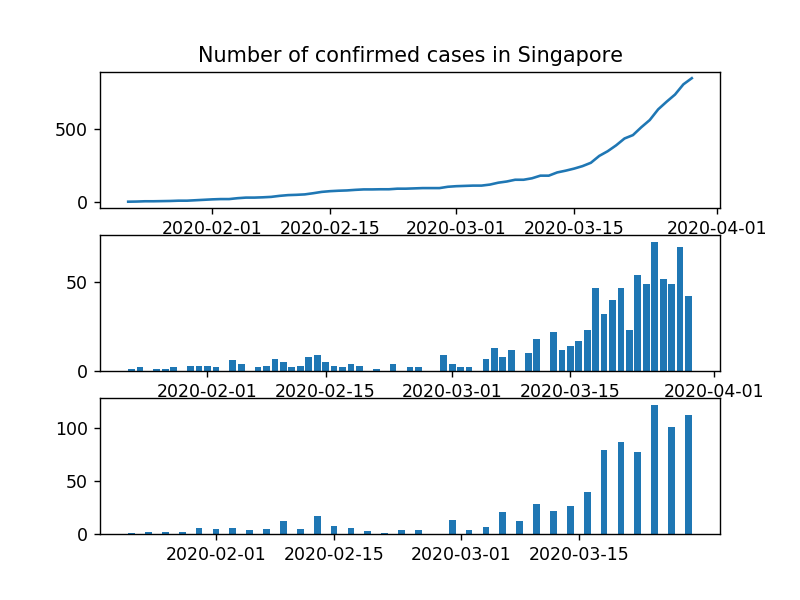

In [13]:
def plotCountry(country):
    totalSeries = confirmed_df.loc[country]
    newCaseDaily = confirmed_df.loc[country].rolling(window=2).aggregate(lambda x: x[1]-x[0])
    newCaseWeekly = newCaseDaily.resample('2D').sum()
    
    fig = plt.figure()
    gspec = gridspec.GridSpec(3,1)
    plt.subplot(gspec[0,0])
    plt.title('Number of confirmed cases in {country}'.format(country=country))
    plt.plot(totalSeries)
    plt.subplot(gspec[1,0])
    plt.bar(newCaseDaily.index, newCaseDaily.values)
    plt.subplot(gspec[2,0])
    plt.bar(newCaseWeekly.index, newCaseWeekly.values)

plotCountry('Singapore')

<IPython.core.display.Javascript object>


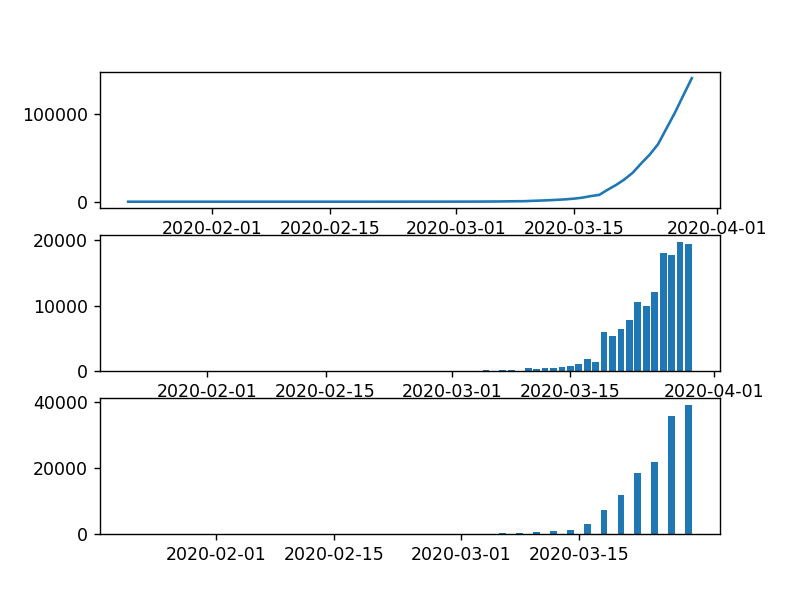

In [10]:
plotCountry('US')